<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
from collections import Counter
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [1]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-01-10 00:05:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  38.8MB/s    in 4.2s    

2025-01-10 00:05:44 (35.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



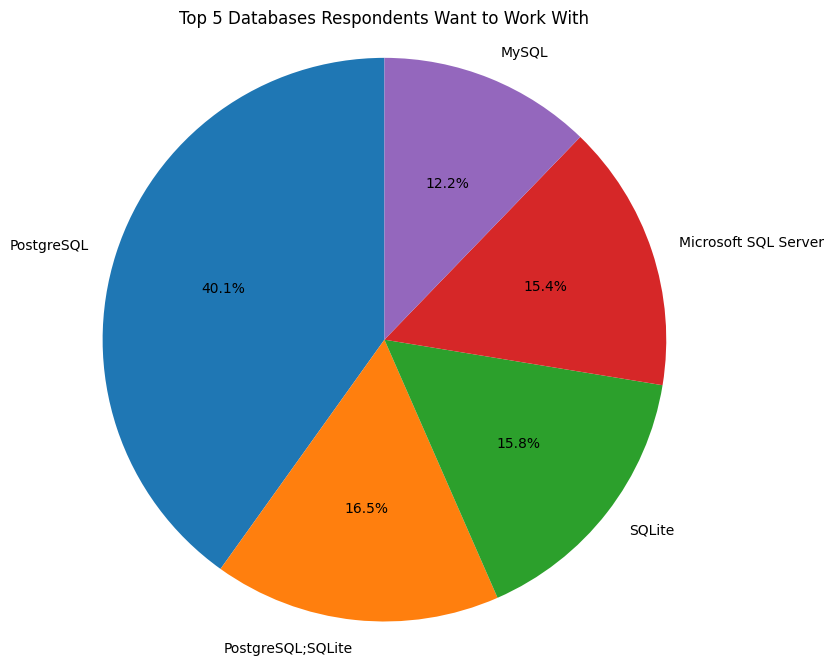

In [2]:
# Count occurrences of each database in the 'DatabaseWantToWorkWith' column
database_counts = df['DatabaseWantToWorkWith'].value_counts()

# Get the top 5 databases
top_5_databases = database_counts.head(5)

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size for better visualization
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Databases Respondents Want to Work With')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Top 5 Most Desired Databases:
PostgreSQL (24005 mentions)
SQLite (13489 mentions)
MySQL (12269 mentions)
MongoDB (10982 mentions)
Redis (10847 mentions)


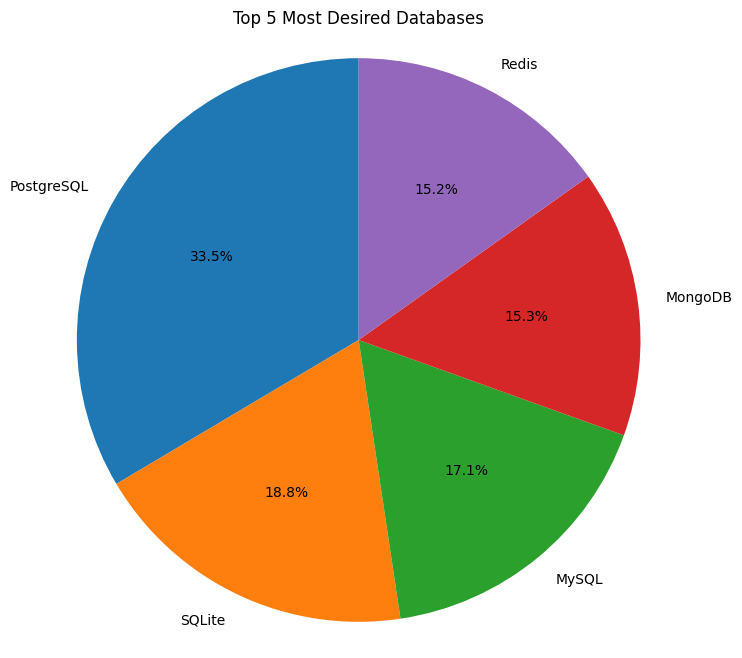

In [6]:
# Filter out missing values
df_filtered = df[df['DatabaseWantToWorkWith'].notna()]

# Get the top 5 most desired databases
top_5_databases = df_filtered['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().value_counts().head(5)

# Print the top 5 databases
print("Top 5 Most Desired Databases:")
for database, count in top_5_databases.items():
  print(f"{database} ({count} mentions)")

plt.figure(figsize=(8, 8))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Most Desired Databases')
plt.axis('equal')
plt.show()

In [7]:
# Filter out missing values
df_filtered = df[df['DatabaseWantToWorkWith'].notna()]

# Get the top 5 most desired databases
top_5_databases = df_filtered['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().value_counts().head(5)

# Print the top 5 databases
print("Top 5 Most Desired Databases:")
for database, count in top_5_databases.items():
  print(f"{database} ({count} mentions)")

# Create the pie chart using plotly express
fig = px.pie(top_5_databases, values=top_5_databases.values, names=top_5_databases.index, title='Top 5 Most Desired Databases')
fig.show()

Top 5 Most Desired Databases:
PostgreSQL (24005 mentions)
SQLite (13489 mentions)
MySQL (12269 mentions)
MongoDB (10982 mentions)
Redis (10847 mentions)


The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



In [8]:
# Filter out missing values in 'DevType'
df_filtered = df[df['DevType'].notna()]

# Get the top 5 developer types
top_5_dev_types = df_filtered['DevType'].str.split(';', expand=True).stack().value_counts().head(5)

# Create the pie chart using plotly express
fig = px.pie(top_5_dev_types, values=top_5_dev_types.values, names=top_5_dev_types.index, title='Top 5 Developer Types')
fig.show()

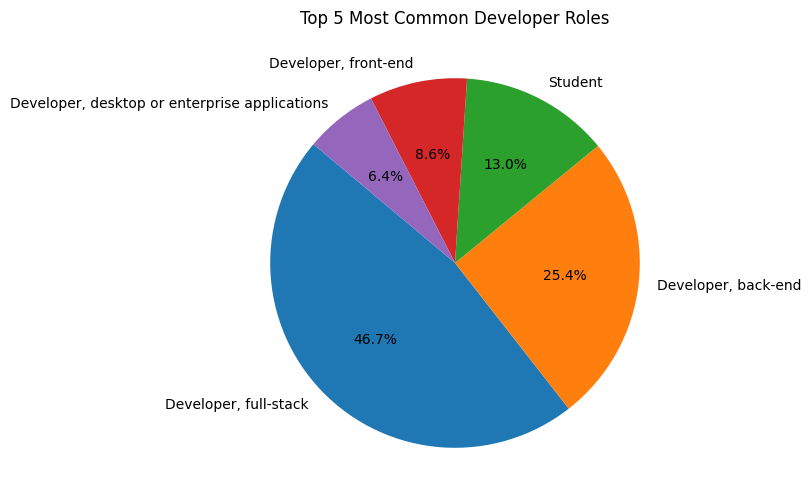

In [9]:
# Filter out missing values
df_filtered = df[df['DevType'].notna()]

# Get the top 5 most common developer types
top_5_dev_types = df_filtered['DevType'].str.split(';').explode().value_counts().head(5).index.tolist()

# 2. Filter DataFrame for top 5 developer types
df_top_5_dev_types = df_filtered[df_filtered['DevType'].str.contains('|'.join(top_5_dev_types))]

# 3. Calculate the count of each developer type
dev_type_counts = df_top_5_dev_types['DevType'].str.split(';').explode().value_counts()

# 4. Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(dev_type_counts, labels=dev_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Most Common Developer Roles")

# Show the plot
plt.show()

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



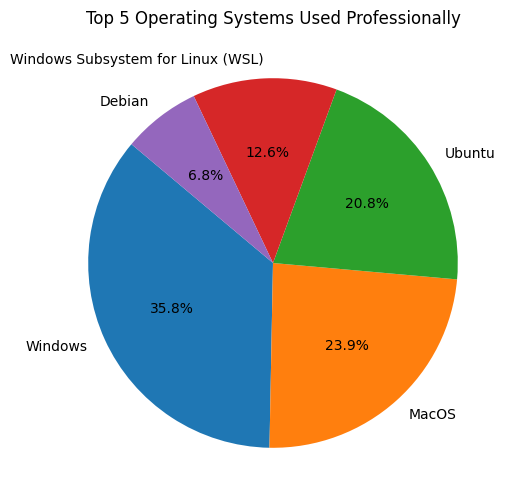

In [14]:
# Filter out missing values in 'OpSysProfessional'
df_filtered = df[df['OpSysProfessional use'].notna()]

# Get the top 5 operating systems used professionally
top_5_opsys = df_filtered['OpSysProfessional use'].str.split(';').explode().value_counts().head(5)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(top_5_opsys, labels=top_5_opsys.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Operating Systems Used Professionally")

# Show the plot
plt.show()

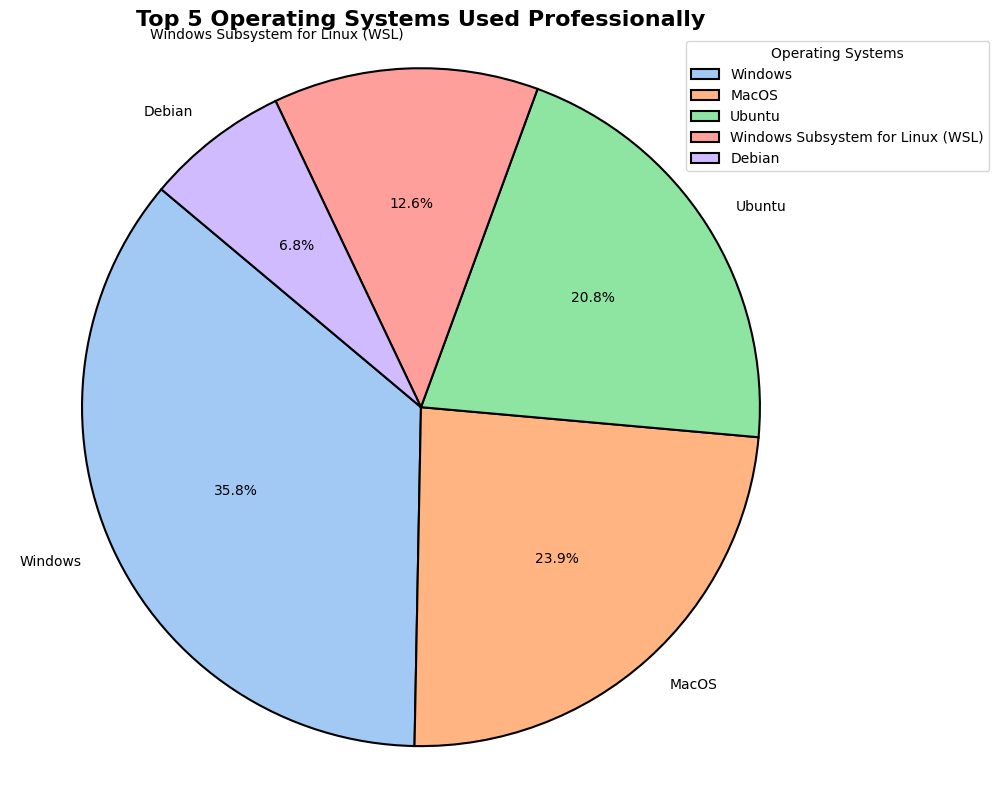

In [15]:
# Filter out missing values in 'OpSysProfessional'
df_filtered = df[df['OpSysProfessional use'].notna()]

# Get the top 5 operating systems used professionally
top_5_opsys = df_filtered['OpSysProfessional use'].str.split(';').explode().value_counts().head(5)

# Define a color palette
colors = sns.color_palette('pastel')[0:5]

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_5_opsys, labels=top_5_opsys.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'antialiased': True})
plt.title("Top 5 Operating Systems Used Professionally", fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(title='Operating Systems', loc='upper right', bbox_to_anchor=(1.2, 1))

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



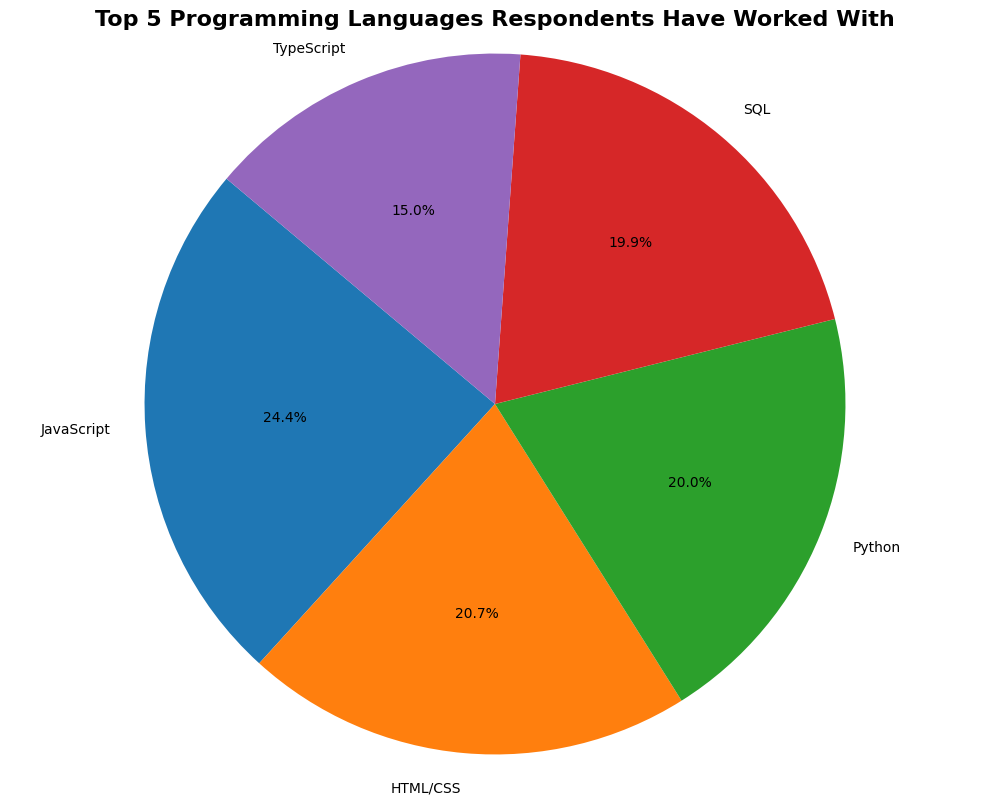

In [16]:
# Filter out missing values in 'LanguageHaveWorkedWith'
df_filtered = df[df['LanguageHaveWorkedWith'].notna()]

# Get the top 5 programming languages respondents have worked with
top_5_languages = df_filtered['LanguageHaveWorkedWith'].str.split(';').explode().value_counts().head(5)

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_5_languages, labels=top_5_languages.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Programming Languages Respondents Have Worked With", fontsize=16, fontweight='bold')
plt.axis('equal')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

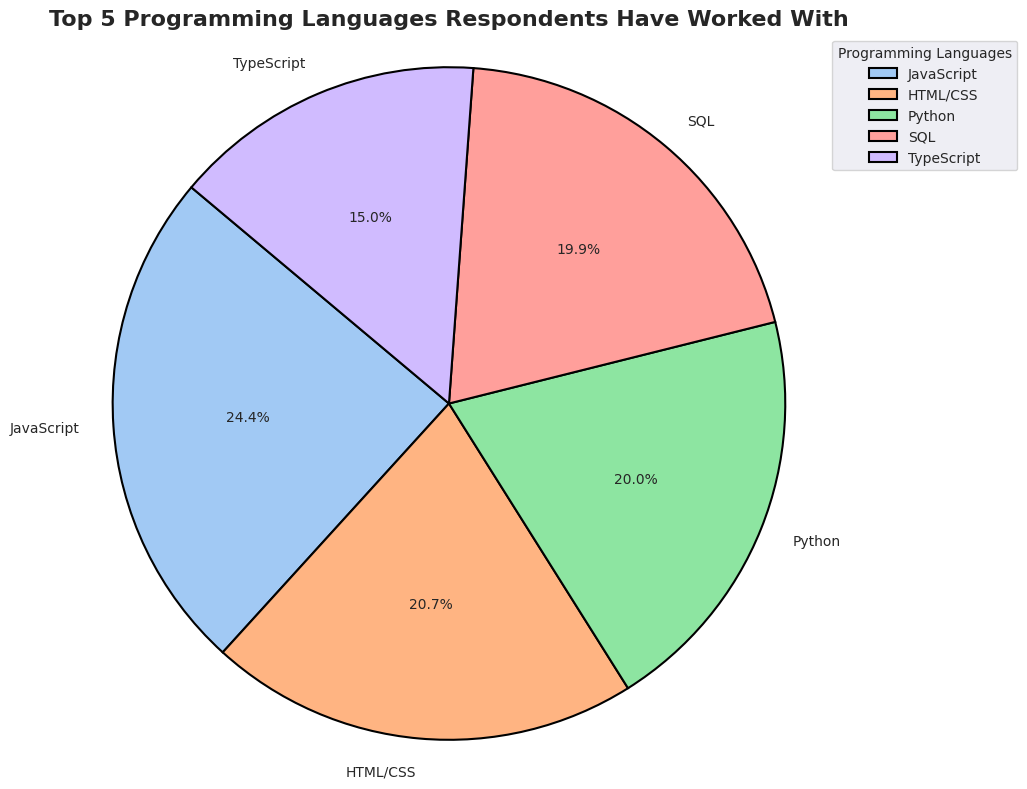

In [18]:
# Explode the 'LanguageHaveWorkedWith' column by splitting it by ';' and stacking the results
df_exploded = df['LanguageHaveWorkedWith'].str.split(';').explode().reset_index(drop=True)

# Calculate the frequency of each programming language
language_counts = df_exploded.value_counts().head(5)

# Define a color palette
colors = sns.color_palette('pastel')[0:5]

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'antialiased': True})
plt.title("Top 5 Programming Languages Respondents Have Worked With", fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(title='Programming Languages', loc='upper right', bbox_to_anchor=(1.2, 1))

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



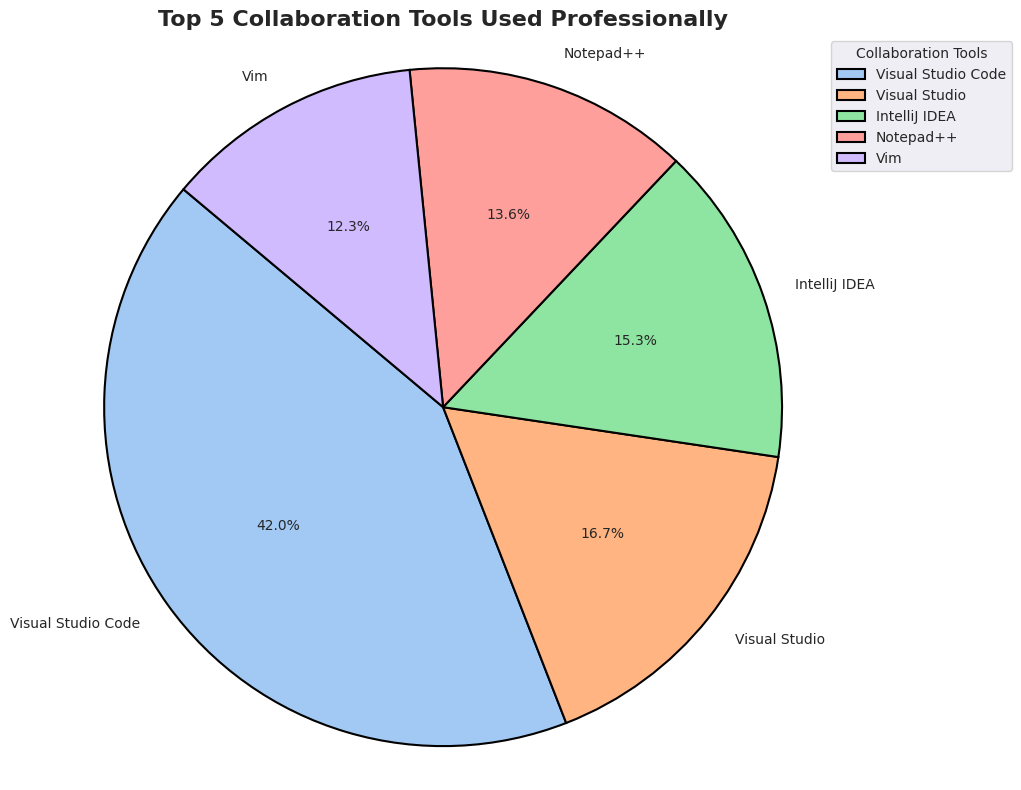

In [19]:
# Filter out missing values in 'NEWCollabToolsHaveWorkedWith'
df_filtered = df[df['NEWCollabToolsHaveWorkedWith'].notna()]

# Get the top 5 collaboration tools used professionally
top_5_collab_tools = df_filtered['NEWCollabToolsHaveWorkedWith'].str.split(';').explode().value_counts().head(5)

# Define a color palette
colors = sns.color_palette('pastel')[0:5]

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_5_collab_tools, labels=top_5_collab_tools.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'antialiased': True})
plt.title("Top 5 Collaboration Tools Used Professionally", fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(title='Collaboration Tools', loc='upper right', bbox_to_anchor=(1.2, 1))

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



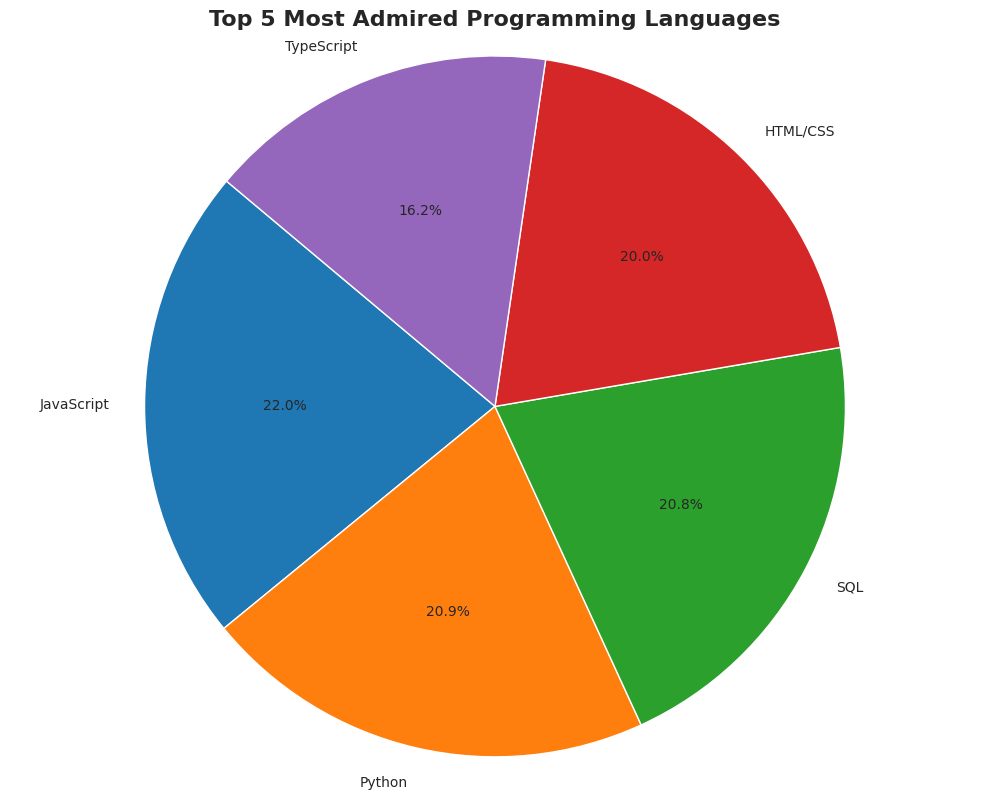

In [20]:
# Filter out missing values in 'LanguageAdmired'
df_filtered = df[df['LanguageAdmired'].notna()]

# Get the top 5 admired programming languages
top_5_admired_languages = df_filtered['LanguageAdmired'].str.split(';').explode().value_counts().head(5)

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_5_admired_languages, labels=top_5_admired_languages.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Most Admired Programming Languages", fontsize=16, fontweight='bold')
plt.axis('equal')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

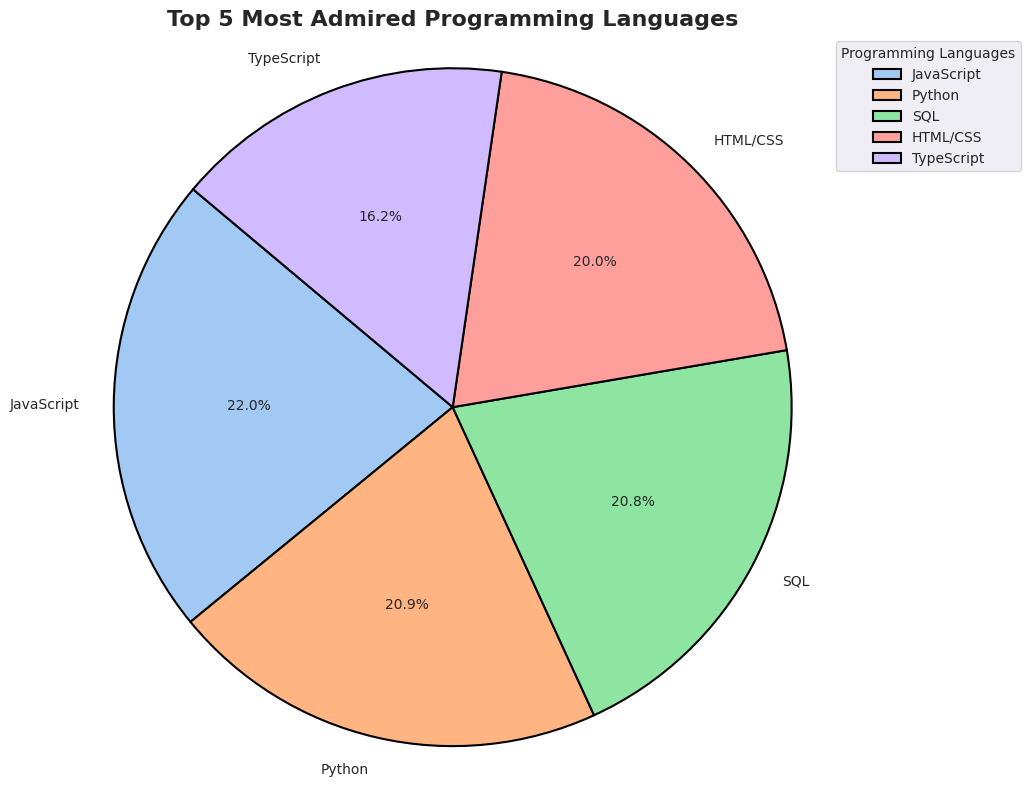

In [21]:
# Explode the 'LanguageAdmired' column by splitting it by ';' and stacking the results
df_exploded = df['LanguageAdmired'].str.split(';').explode().reset_index(drop=True)

# Calculate the frequency of each admired programming language
admired_language_counts = df_exploded.value_counts().head(5)

# Define a color palette
colors = sns.color_palette('pastel')[0:5]

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(admired_language_counts, labels=admired_language_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'antialiased': True})
plt.title("Top 5 Most Admired Programming Languages", fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(title='Programming Languages', loc='upper right', bbox_to_anchor=(1.2, 1))

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



Error: Column 'AIToolCurrentlyUsing' not found in the DataFrame.


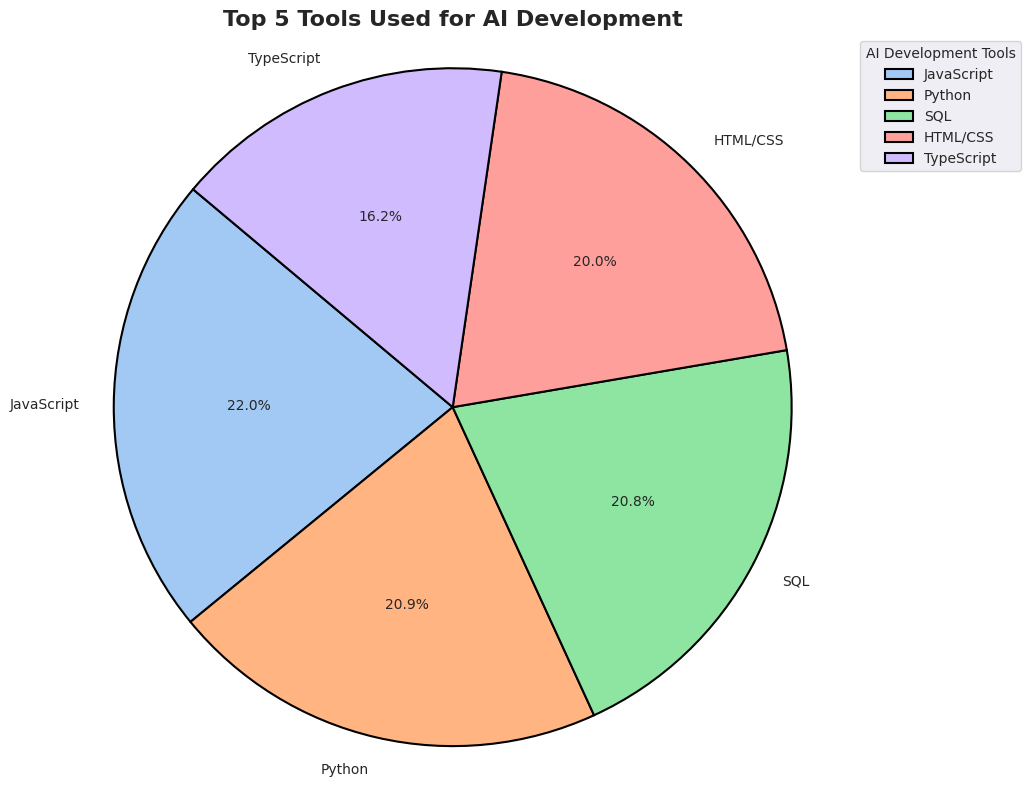

In [24]:
# Explode the 'AIToolCurrentlyUsing' column by splitting it by ';' and stacking the results
# Check if the column name exists in the DataFrame
if 'AIToolCurrentlyUsing' in df.columns:
    df_exploded = df['AIToolCurrentlyUsing'].str.split(';').explode().reset_index(drop=True)
else:
    # Print an error message if the column is not found
    print("Error: Column 'AIToolCurrentlyUsing' not found in the DataFrame.")
    # You can also handle this error by assigning an empty Series or DataFrame to df_exploded
    # to prevent the code from crashing. For example:
    # df_exploded = pd.Series([], dtype=object)  # Create an empty Series
    # Or
    # df_exploded = pd.DataFrame(columns=['AIToolCurrentlyUsing'])  # Create an empty DataFrame with the column

# Calculate the frequency of each AI development tool
# Check if df_exploded is not empty before proceeding
if not df_exploded.empty:
    ai_tool_counts = df_exploded.value_counts().head(5)

    # Define a color palette
    colors = sns.color_palette('pastel')[0:5]

    # Create the pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(ai_tool_counts, labels=ai_tool_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'antialiased': True})
    plt.title("Top 5 Tools Used for AI Development", fontsize=16, fontweight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Add a legend
    plt.legend(title='AI Development Tools', loc='upper right', bbox_to_anchor=(1.2, 1))

    # Improve layout
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("Error: df_exploded is empty. Check the column name and data.")

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



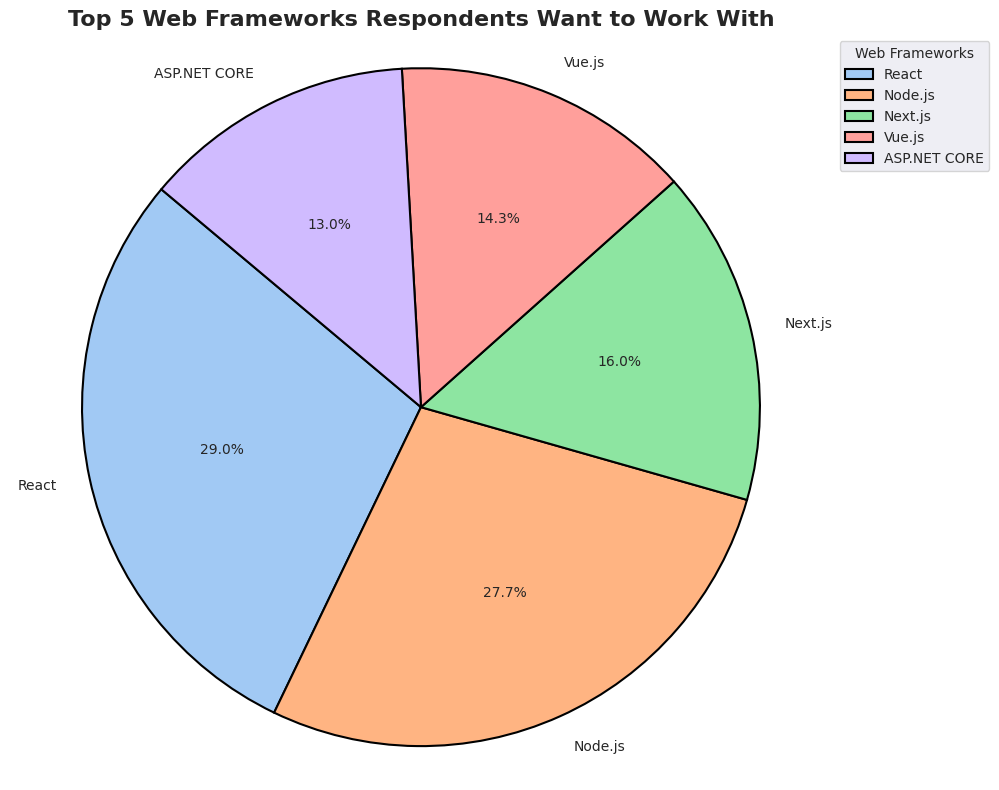

In [25]:
# Filter out missing values in 'WebframeWantToWorkWith'
df_filtered = df[df['WebframeWantToWorkWith'].notna()]

# Get the top 5 web frameworks respondents want to work with
top_5_webframeworks = df_filtered['WebframeWantToWorkWith'].str.split(';').explode().value_counts().head(5)

# Define a color palette
colors = sns.color_palette('pastel')[0:5]

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_5_webframeworks, labels=top_5_webframeworks.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'antialiased': True})
plt.title("Top 5 Web Frameworks Respondents Want to Work With", fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(title='Web Frameworks', loc='upper right', bbox_to_anchor=(1.2, 1))

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



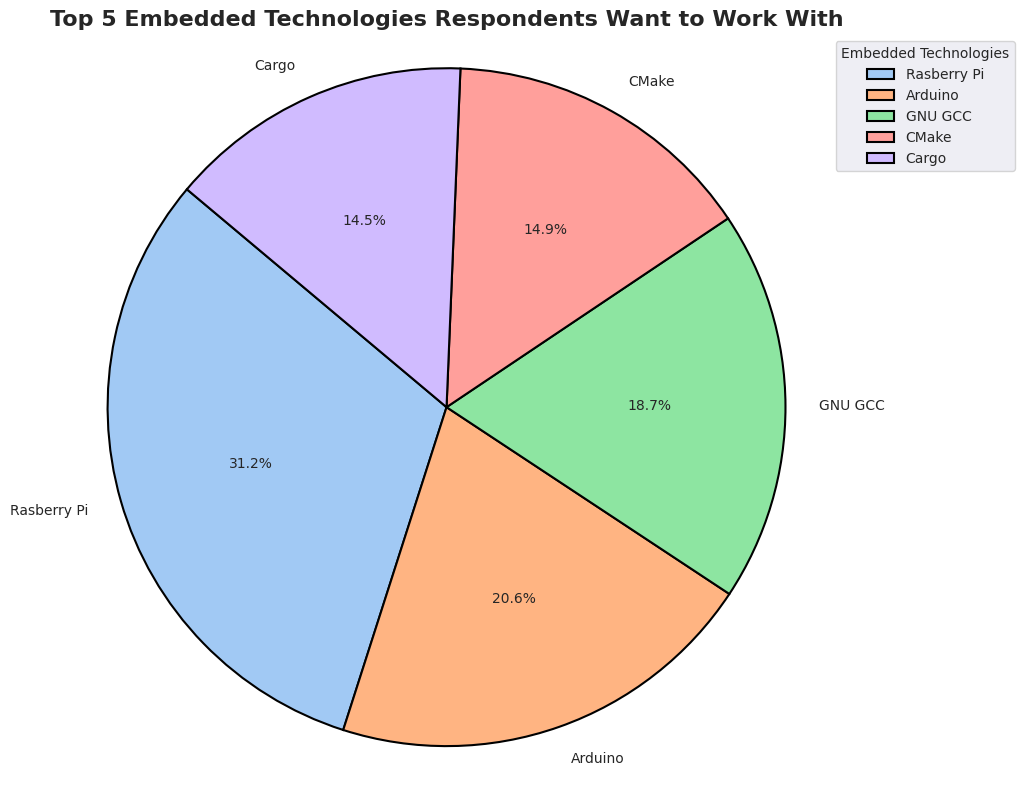

In [26]:
# Filter out missing values in 'EmbeddedWantToWorkWith'
df_filtered = df[df['EmbeddedWantToWorkWith'].notna()]

# Get the top 5 embedded technologies respondents want to work with
top_5_embedded = df_filtered['EmbeddedWantToWorkWith'].str.split(';').explode().value_counts().head(5)

# Define a color palette
colors = sns.color_palette('pastel')[0:5]

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_5_embedded, labels=top_5_embedded.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'antialiased': True})
plt.title("Top 5 Embedded Technologies Respondents Want to Work With", fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(title='Embedded Technologies', loc='upper right', bbox_to_anchor=(1.2, 1))

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
